# An example of using candex to extract data for point data, in this case capitals of the world
## Source netCDF file are ERA5 limited to North American Domain and Caribbean domain

In [4]:
# loading candex
from candex.candex import candex

# initializing candex object
cndx = candex()

# specifying candex needed arguments
cndx.case_name              = 'ERA5_capitals_north_america'
cndx.temp_dir               = '../temporary/'
cndx.sink_shp               = '../data/target_shapefiles/Capitals_point.shp' # all the world capitals
cndx.source_nc              = '../data/Source_nc_ERA5/ERA5_NA_*.nc' # ERA5 limited to North America and Caribbean
cndx.var_names              = ['airtemp']
cndx.var_lon                = 'longitude' 
cndx.var_lat                = 'latitude'
cndx.var_time               = 'time'
cndx.output_dir             = '../output/'
cndx.format_list            =  ['f4']
cndx.fill_value_list        = ['-9999.00']
#cndx.remap_csv        = '../temporary/ERA5_capitals_north_america_remapping.csv'

# execute candex
cndx.run_candex()

no  author name is provide and the author name is changes to (author name)!
candex detects that target shapefile is in WGS84 (epsg:4326)
candex detects that no field for ID is provided in sink/target shapefile
arbitarary values of ID are added in the field ID_t
candex detects that no field for latitude is provided in sink/target shapefile
latitude values are added in the field lat_t


/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:245: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if detected_multipoints:
/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return shp


candex detects that no field for longitude is provided in sink/target shapefile
longitude values are added in the field lon_t
candex detects point(s) as geometry of target shapefile and will apply small buffer to them
it seems everything is OK with the sink/target shapefile; added to candex object sink_shp_gpd
candex will save standard shapefile for candex claculation as:
../temporary/ERA5_capitals_north_america_sink_shapefile.shp
candex detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
candex detects that all the varibales have dimensions of:
['time', 'latitude', 'longitude']
candex detects that the longitude varibales has dimensions of:
['longitude']
candex detects that the latitude varibales has dimensions of:
['latitude']
candex detects case 1 - regular lat/lon
[-0.25]
(1,)
[0.25]
(1,)
candex is creating the shapefile from the netCDF file and saving it here:
../temporary/ERA5_capitals_north_america_source_shapefi

/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:766: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for i in ID_S2_unique:
/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:778: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  'AP1N'     : 'weight'}
/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:866: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  dfsym.drop(['geometry_1', 'geometry_2'], axis=1, inplace=True)
/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:870: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now

Remapping ../data/Source_nc_ERA5/ERA5_NA_19790101.nc to ../output/ERA5_capitals_north_america_remapped_1979-01-01-00-00-00.nc
Started at date and time 2021-03-02 23:59:30.400195
Ended   at date and time 2021-03-02 23:59:30.536005
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790102.nc to ../output/ERA5_capitals_north_america_remapped_1979-01-02-00-00-00.nc
Started at date and time 2021-03-02 23:59:30.541481
Ended   at date and time 2021-03-02 23:59:30.656186
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790103.nc to ../output/ERA5_capitals_north_america_remapped_1979-01-03-00-00-00.nc
Started at date and time 2021-03-02 23:59:30.664197
Ended   at date and time 2021-03-02 23:59:30.776697


--------------
--------------
# Visualization of the source and the results

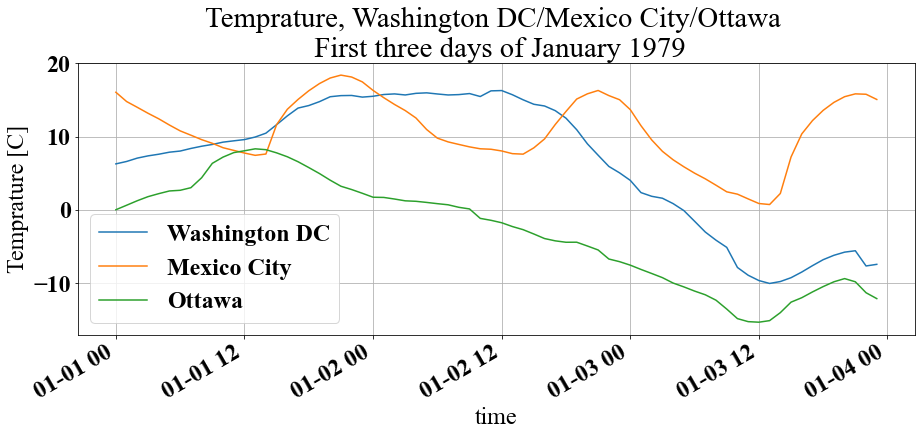

In [5]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

shp = gpd.read_file( cndx.temp_dir + cndx.case_name + '_intersected_shapefile.shp')
#print(shp)

# the intersected shapefile shows that the ID_t of Washington, D.C., Ottawa and Mexico City is 187, 102 and 192 meaning that
# they corresponse to the ID of 187 and 192 in the original shapefile of the capitals of the world
# many of the capitals are not in the intersection as the ERA5 data is limited to North America and Caribbean


# merge the output file into one xarray dataset
ds = xr.merge([xr.open_dataset(f) for f in sorted(glob.glob(cndx.output_dir+cndx.case_name +'*.nc'))])
#print(ds)
ds.airtemp [:,:] = ds.airtemp[:,:] - 273; # Kelvin to Celsius

# extract the data and plotting
fig, axes = plt.subplots(1,1,figsize=(15,5))

WashingtonDC = ds.sel(ID=187, method = 'nearest') # ID_t, the target ID for Washington DC is 187
WashingtonDC.airtemp.plot(ax = axes, label='Washington DC')

MexicoCity = ds.sel(ID=192, method = 'nearest') # ID_t, the target ID for Washington DC is 192
MexicoCity.airtemp.plot(ax = axes, label='Mexico City')

Ottawa = ds.sel(ID=102, method = 'nearest') # ID_t, the target ID for Washington DC is 192
Ottawa.airtemp.plot(ax = axes, label='Ottawa')

plt.grid()
plt.ylabel ('Temprature [C]')
plt.title ('Temprature, Washington DC/Mexico City/Ottawa \n First three days of January 1979')
plt.legend()